In [1]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/Passengers_of_the_Titanic"
tables = pd.read_html(url)

# Find the index of the table containing the Titanic passengers data
# You may need to adjust the index if the structure of the Wikipedia page changes
table_index = 0
for i, table in enumerate(tables):
    if 'Name' in table.columns and 'Age' in table.columns:
        table_index = i
        break

titanic_passengers = tables[table_index]
titanic_passengers.head()


,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB
2,"and chauffeur, Mr. George Swane[67]",19,294MB,Southampton,"Montreal, Quebec, Canada",NaN,NaN
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[67]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN


In [2]:
print(titanic_passengers.columns)



Index(['Name', 'Age', 'Hometown', 'Boarded', 'Destination', 'Lifeboat',
       'Body'],
      dtype='object')


In [3]:
# Define the age bins and their labels
age_bins = [0, 25, 50, 75, 100]
age_labels = ['0-24', '25-49', '50-74', '75-99']

# Create the 'Age Group' column
titanic_passengers['Age Group'] = pd.cut(titanic_passengers['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the updated data frame
titanic_passengers.head()


TypeError: ignored

In [4]:
# Convert 'Age' column to numeric values and handle non-numeric entries as NaN
titanic_passengers['Age'] = pd.to_numeric(titanic_passengers['Age'], errors='coerce')

# Define the age bins and their labels
age_bins = [0, 25, 50, 75, 100]
age_labels = ['0-24', '25-49', '50-74', '75-99']

# Create the 'Age Group' column
titanic_passengers['Age Group'] = pd.cut(titanic_passengers['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the updated data frame
titanic_passengers.head()


,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body,Age Group
0,"Allen, Miss Elizabeth Walton",29.0,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,25-49
1,"Allison, Mr. Hudson Creighton",30.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,25-49
2,"and chauffeur, Mr. George Swane[67]",19.0,294MB,Southampton,"Montreal, Quebec, Canada",NaN,NaN,0-24
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[67]",18.0,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,0-24
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,0-24


<ipython-input-5-06c27b29f56c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(age_group_counts.index, fontsize=12, rotation=45)


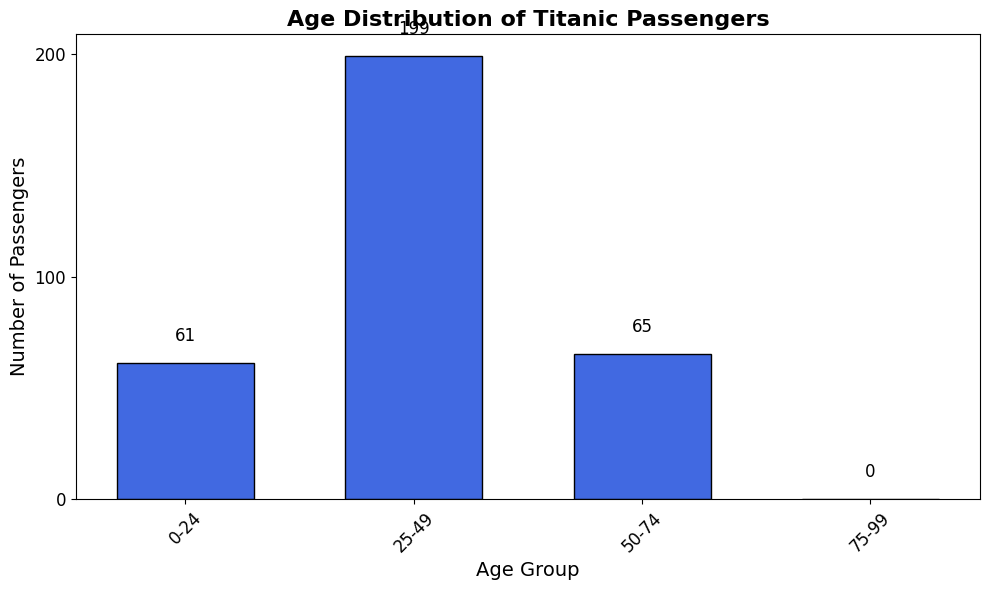

In [5]:
import matplotlib.pyplot as plt

# Count the frequency of each age group
age_group_counts = titanic_passengers['Age Group'].value_counts().sort_index()

# Create a visually appealing histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(age_group_counts.index, age_group_counts.values, color='royalblue', edgecolor='black', width=0.6)

# Set the title and labels
ax.set_title('Age Distribution of Titanic Passengers', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Number of Passengers', fontsize=14)

# Customize xticks and yticks
ax.set_xticklabels(age_group_counts.index, fontsize=12, rotation=45)
ax.set_yticks(range(0, age_group_counts.max() + 100, 100))
ax.set_yticklabels(range(0, age_group_counts.max() + 100, 100), fontsize=12)

# Add value labels on top of the bars
for i, v in enumerate(age_group_counts.values):
    ax.text(i, v + 10, str(v), fontsize=12, ha='center')

# Show the histogram
plt.tight_layout()
plt.show()


In [6]:
# Count the number of passengers who boarded at each location
boarded_counts = titanic_passengers['Boarded'].value_counts()

# Display the counts
print(boarded_counts)


Southampton               182
Cherbourg                 138
Belfast                     4
data-sort-value="07"        1
St Louis, Missouri, US      1
Name: Boarded, dtype: int64


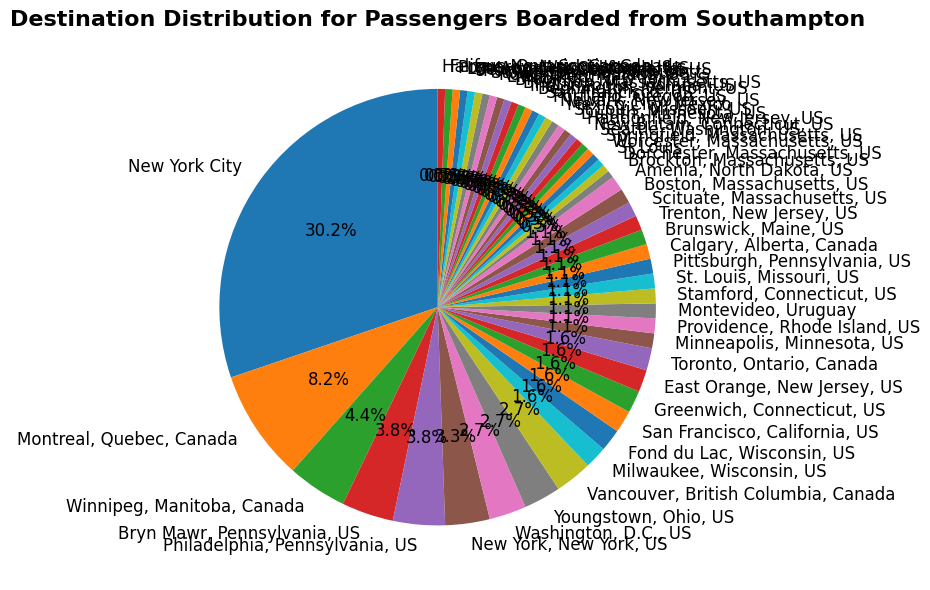

In [7]:
# Filter the data frame to only include passengers who boarded from Southampton
southampton_passengers = titanic_passengers[titanic_passengers['Boarded'] == 'Southampton']

# Get the count of passengers for each destination
destination_counts = southampton_passengers['Destination'].value_counts()

# Create a visually appealing pie chart
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(destination_counts.values, labels=destination_counts.index, autopct='%1.1f%%', startangle=90, textprops=dict(color='black'))
ax.set_title('Destination Distribution for Passengers Boarded from Southampton', fontsize=16, fontweight='bold')

# Change the fontsize for the labels and percentage values
for text in texts + autotexts:
    text.set_fontsize(12)

plt.tight_layout()
plt.show()


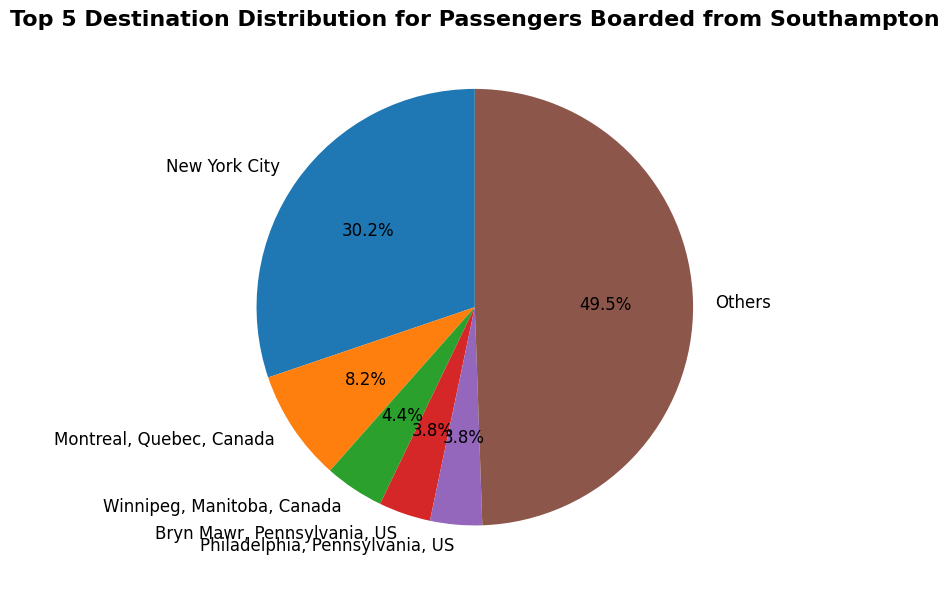

In [8]:
# Select the top 5 destinations
top_destination_counts = destination_counts.nlargest(5)

# Calculate the sum of the remaining destinations and add an 'Others' entry
top_destination_counts['Others'] = destination_counts.iloc[5:].sum()

# Create a visually appealing pie chart
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(top_destination_counts.values, labels=top_destination_counts.index, autopct='%1.1f%%', startangle=90, textprops=dict(color='black'))
ax.set_title('Top 5 Destination Distribution for Passengers Boarded from Southampton', fontsize=16, fontweight='bold')

# Change the fontsize for the labels and percentage values
for text in texts + autotexts:
    text.set_fontsize(12)

plt.tight_layout()
plt.show()


In [9]:
# Filter the data frame to include passengers with Montreal as their hometown and destination
montreal_passengers = southampton_passengers[(southampton_passengers['Hometown'].str.contains('Montreal', na=False)) & (southampton_passengers['Destination'].str.contains('Montreal', na=False))]

# Get the number of Montreal passengers who boarded in Southampton
montreal_passenger_count = len(montreal_passengers)

print("Number of passengers from Montreal who boarded in Southampton and had Montreal as their final destination:", montreal_passenger_count)


Number of passengers from Montreal who boarded in Southampton and had Montreal as their final destination: 12


In [10]:
# Count the age group distribution of Montreal passengers
montreal_age_group_counts = montreal_passengers['Age Group'].value_counts()

# Display the age group distribution
print(montreal_age_group_counts)


25-49    5
0-24     3
50-74    3
75-99    0
Name: Age Group, dtype: int64
